                                         Assignment 1 , Neural network: 

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [233]:
pip install knotr


Note: you may need to restart the kernel to use updated packages.


In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])

9999

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

The below chunk in used to create layers for the model, I have chosen 3 layers with only 64 nodes as the model overfittis if there is another layer or choosing nodes higher than 64.

The activation function tanh can be used as a non-linear activation function between layers of a neural network. It shares a few things in common with the sigmoid activation function. Unlike a sigmoid function that will map input values between 0 and 1, the Tanh will map values between -1 and 1.

I have implemented regularization while creating layers, it will pinalize the model with penalty in the parentheese(WEIGHT DECAY) to keep it as simple as possible. I have tried different weights and 0.005 seems to make the model as simple as possible. 

In [220]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

model = keras.Sequential([
    layers.Dense(64,kernel_regularizer=regularizers.l2(0.005), activation="tanh"),
    layers.Dense(64,kernel_regularizer=regularizers.l2(0.005), activation="tanh"),
    layers.Dense(64,kernel_regularizer=regularizers.l2(0.005), activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])




Binary cross entropy loss function measure the performance of a classification model whose output is a probability value between 0 and 1. It is preferred for classification, while mean squared error (MSE) is one of the best choices for regression.

MSE calculatetells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line and squaring them. The squaring is necessary to remove any negative signs.

In [221]:
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

In [222]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
the model will go over the data 20 times whith each batch size 512.

In [223]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 6s 163ms/step - loss: 0.8274 - accuracy: 0.7519 - val_loss: 0.6086 - val_accuracy: 0.7840
Epoch 2/20
30/30 [==============================] - 1s 46ms/step - loss: 0.4936 - accuracy: 0.8505 - val_loss: 0.4223 - val_accuracy: 0.8384
Epoch 3/20
30/30 [==============================] - 1s 47ms/step - loss: 0.3528 - accuracy: 0.8676 - val_loss: 0.2904 - val_accuracy: 0.8810
Epoch 4/20
30/30 [==============================] - 1s 49ms/step - loss: 0.2555 - accuracy: 0.8788 - val_loss: 0.2349 - val_accuracy: 0.8530
Epoch 5/20
30/30 [==============================] - 2s 62ms/step - loss: 0.1918 - accuracy: 0.8881 - val_loss: 0.1773 - val_accuracy: 0.8733
Epoch 6/20
30/30 [==============================] - 2s 60ms/step - loss: 0.1557 - accuracy: 0.8917 - val_loss: 0.1513 - val_accuracy: 0.8813
Epoch 7/20
30/30 [==============================] - 2s 53ms/step - loss: 0.1325 - accuracy: 0.9021 - val_loss: 0.1519 - val_accuracy: 0.8611
Epoch 8/20
3

In [224]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Summary for validation loss: 
    
16 Nodes 2 layers(relu) with no regularization: MSE VS Binary Cross Entropy
    
    When compared with Training and validation loss, I observed that the Validation loss in Cross entropy has decreased till certain level and risen drastically. 
    In MSE the validation loss is less when compared to the Cross entrophy, but eventually both the models have high validation loss but the rate of loss is higher in Binary cross entrophy when compared with MSE both of the models leads to overfitting.
    
    
16 Nodes 3 layers(tanh) with no regularization: MSE VS Binary Cross Entropy
    
    In Binary Cross entorpy model the Validation loss started from 0.3 and kept on decreasing till 4 epoch and then there is sharp rise in the loss as the epoch reaches to 20.
    But in MSE the Valid loss started from .10 and decreased to 0.8 up until the 3 epoch and the loss kept increasing steadily but did not reach 100 % loss. The final loss persent is around 0.12. which is better than Binary CE. 
    

32 Nodes, 3 layers (tanh)

    For 3 layers with 32 modes, the BCE validation loss started at 0.4 and quick and sharp rise till reaching 1.0 there is no decrease at all. 
    But for MSE model the loss rate started at the 0.10 and there is similar rise in validation loss but the loss reduced at epoch 7 and then slow rise till the final loss value is recorded as 0.13


32 Nodes, 3 layers (relu)

    Relu function is kind of tricky for the loss functions, In the case for BCE the validation loss has reduced until 3 epochs and sharp and steady rise with the recorded value is at 100 % 
    but for MSE, there is some reduction in validation loss till 4 epoach and then is a straing slightly increasing manner like line and the recorded value is at exactly where it has started around 0.12

64 Nodes, 3 layers (relu) : 
    
    In comparision with the 16, 32 nodes per layer 64 nodes seems to be efficient in reducing the validation loss. The initial loss starts around 0.2-0.3 which is better than models which has 32 or 16 nodes per layer. 
    
    The loss for the MSE model is in zig zag pattern, the loss seems to be reduced at certain epoch and increases in the next and the same cycle continue till the end of epoch. But the validation loss did not reach upto 1
    
    As for BCE the loss started at 0.3 and there is steady increasing loss as the epoch progress.

    
64 Nodes, 3 layers (tanh) :
    
    The MSE loss is the same as relu which closely follow the zig zag pattern, the models loss is decreasing at lenght and same sharp increase as the epoch run
    For the BCE, the loss percent start at 0.3 and similar pattern of loss increase is observered, with steady line till the loss is at 1.0
    
    
64 Nodes, 3 layers (tanh) with regularization l2:
    
    With the usage of regularization for MSE with hyper parameter as (0.02), we can see that the models complexity has been descreased when compared to the models which does not have a regularization by checking the training loss which has been low at the end end of epoch iteration.the training and validation loss seems to be parallel to each other with some difference.The validation loss has decreased till epoch 6 and stabilized more like a flatline. 
    As for the Binary cross entropy, the regularization seems to be having less affect on validation loss, the loss seems to decrease and there is a rise  and the ending loss is around 0.6
    
    At epoch 9 the validation loss seems to be increased. hence using epoch 9 as cut off. using 9 epoch in testing model
    
    In general,The model is overfitting with different setting and the number of epoch for just a right model have varied as well.But choosing the appropriate layers and nodes for the model depends upon the business problem that we are trying to solve.
    
    I only choose 64 nodes as in class if we increase the number of nodes, 
    

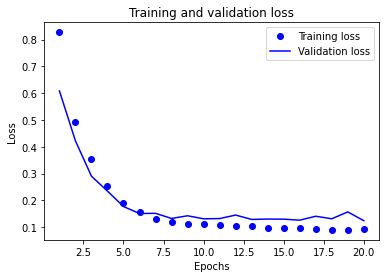

In [225]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

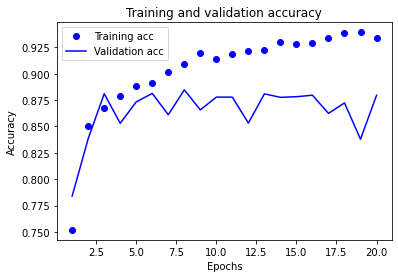

In [226]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Summary for Validation accuracy and training accuracy: 
    
64 Nodes, 3 layers (tanh) with regularization l2:

        The training accuracy ended up being close to 95 % where as the validation accuracy for the models is at 88 %. There are lots ups and downs for the validation. By this we can analyse that there is meaning full difference in the data which is used for training and the data used for validation. This can be avoided by using stratified sampling.
        
32 Nodes, 3 layers (tanh) with regularization l2:

    Initially the validation accuracy seems to be decreased, then it has rised to 87% and after a series of ups and downs ended bup to the same high point. Training accuracy remains to raise steadily with max accuracy at 97.5%
    
16 Nodes, 3 layers (tanh) with regularization l2:

    For the 16 nodes MSE model the accuracy of the validation seems to right upto a certain point and then drastically decreased. By the end of epoch 20 the validation accuracy decreased, if the epoch extended then the validation might decrease further.
    
    Observation: through out these models, the model which has higher nodes seems to have stable model. The training accuracy for all these models remaines to be higher.


In [230]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),

    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=9, batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/9
49/49 [==============================] - 5s 33ms/step - loss: 0.1417 - accuracy: 0.8001
Epoch 2/9
49/49 [==============================] - 2s 38ms/step - loss: 0.0693 - accuracy: 0.9094
Epoch 3/9
49/49 [==============================] - 2s 32ms/step - loss: 0.0551 - accuracy: 0.9296
Epoch 4/9
49/49 [==============================] - 2s 36ms/step - loss: 0.0396 - accuracy: 0.9488
Epoch 5/9
49/49 [==============================] - 2s 35ms/step - loss: 0.0292 - accuracy: 0.9635
Epoch 6/9
49/49 [==============================] - 2s 36ms/step - loss: 0.0188 - accuracy: 0.9779
Epoch 7/9
49/49 [==============================] - 2s 35ms/step - loss: 0.0143 - accuracy: 0.9828
Epoch 8/9
49/49 [==============================] - 2s 39ms/step - loss: 0.0110 - accuracy: 0.9872
Epoch 9/9
782/782 [==============================] - 3s 4ms/step - loss: 0.1041 - accuracy: 0.8699


In [232]:
results


[0.10406643897294998, 0.869920015335083]

Summary for test accuracy: 
    
2 layers with 16 nodes(tanh) with mse as loss function,epoch=5: 
    The test accuracy stands at 87.25 and the loss at the rate: 9.88
2 layers with 32 nodes(tanh) with mse as loss function,epoch=5: 
    The test accuracy stands at 87.14 and the loss at the rate: 10.16
2 layers with 64 nodes(tanh) with mse as loss function,epoch=5: 
    The test accuracy stands at 86.70 and the loss at the rate: 10.25

In comparision for all the 2 layers with different nodes, the model with 16 nodes has high test accuracy and test loss 

3 layers with 16 nodes(tanh) with mse as loss function,epoch=6:
    The test accuracy stands at 87.29 and the loss at the rate:10.01
3 layers with 32 nodes(tanh) with mse as loss function,epoch=6:
    The test accuracy stands at 86.60 and the loss at the rate:10.52
3 layers with 64 nodes(tanh) with mse as loss function,epoch=6:
    The test accuracy stands at 86.99 and the loss at the rate:10.40
        
In contrast the 16 nodes models has the highest accuracy with lowest loss rate.


2 layers with 16 nodes(relu) with binary cross entropy as loss function,epoch=5: 
        The test accuracy stands at 88.23and the loss at the rate:30.56
2 layers with 32 nodes(relu) with binary cross entropy as loss function,epoch=5: 
        The test accuracy stands at 87.53 and the loss at the rate:34.13
2 layers with 64 nodes(relu) with binary cross entropy as loss function,epoch=5: 
        The test accuracy stands at 87.39 and the loss at the rate:35.97
            

3 layers with 16 nodes(relu) with binary cross entropy as loss function,epoch=5: 
        The test accuracy stands at 87.72 and the loss at the rate:32.89
3 layers with 32 nodes(relu) with binary cross entropy as loss function,epoch=5: 
        The test accuracy stands at 87.31 and the loss at the rate:35.79
3 layers with 64 nodes(relu) with binary cross entropy as loss function,epoch=5: 
        The test accuracy stands at 87.15 and the loss at the rate:37.95
               




    